In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri

35.69054182213175
35.630734482917646
35.727520478066445
36.59267710908002
37.29636997279807
35.6706159346446
40.77488010235556
43.43431715091466
44.644594024915655
38.66394655708353
44.55060466447105
46.551792736933024
47.40424240254826
43.49146850954214
48.415330252712366
49.70713073011921
50.39678912384954


(2, 100)

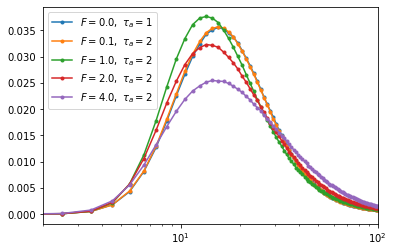

In [30]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
fpath='../../data/SAC/VCV/'
ind=3

vcv=[]
Fs=[]
Tas=[]
for fname in os.listdir(fpath):
    if 'VCV' in fname and '.npz' in fname:
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        dt=float(fname.split('_')[ind+8].replace('dt',''))
        # print(T,F,Ta,Esoft,R0)

        npzfile=np.load(fpath+fname)
        Fs.append(F)
        Tas.append(Ta)
        
        vcv_avg=simps(npzfile['hist']*npzfile['bins'], npzfile['bins'])
        print(vcv_avg)
        vcv.append(vcv_avg)
        
        if F==0.0 or Ta==2:
            ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f},\ \\tau_a={:.0f}$'.format(F,Ta))

ax.legend()
ax.semilogx()
ax.set_xlim(2,100)


[]

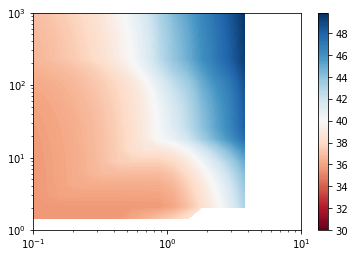

In [35]:
Xi,Yi=np.meshgrid(np.logspace(-1,1,20),np.logspace(0,3,20))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,vcv)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(30.,50,0.1),cmap='RdBu')
plt.colorbar()
plt.loglog()
